In [9]:
import os
import sys

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint
from tqdm.auto import tqdm
import galsim
from copy import deepcopy
import random

# set paths to various directories based on the machine this code is being executed on
try:
    with initialize(version_base=None, config_path='config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']
except:
    with initialize(version_base=None, config_path='../../config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.lenses import lens_util
from mejiro.helpers import survey_sim

In [15]:
save_dir = os.path.join(config.machine.data_dir, 'snr_per_pixel_threshold')

snr_filepaths = glob(os.path.join(save_dir, 'snrs_*.npy'))
snr_lists = [np.load(f) for f in snr_filepaths]

masked_snr_array_filepaths = glob(os.path.join(save_dir, 'masked_snr_arrays_*.npy'))
masked_snr_array_lists = [np.load(f) for f in masked_snr_array_filepaths]

assert len(snr_lists) == len(masked_snr_array_lists)
print(f'{len(snr_lists)} file(s) found')

114 file(s) found


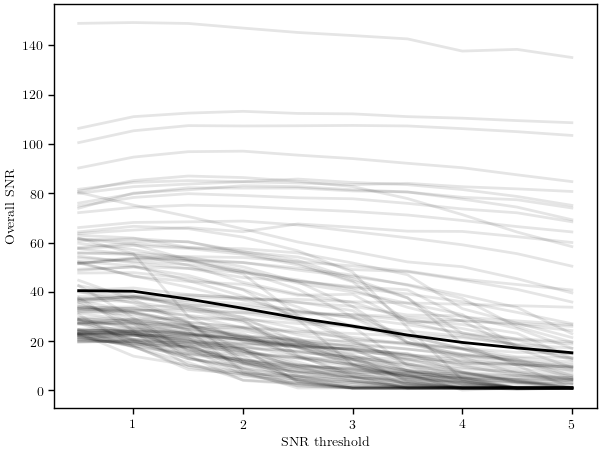

In [13]:
snr_thresholds = np.linspace(0.5, 5, 10)

mean = np.mean(snr_lists, axis=0)
plt.plot(snr_thresholds, mean, 'k', alpha=1)

for snr_list in snr_lists:
    if snr_list[0] == 0:
        continue
    plt.plot(snr_thresholds, snr_list, 'k', alpha=0.1)

plt.xlabel('SNR threshold')
plt.ylabel('Overall SNR')
plt.show()

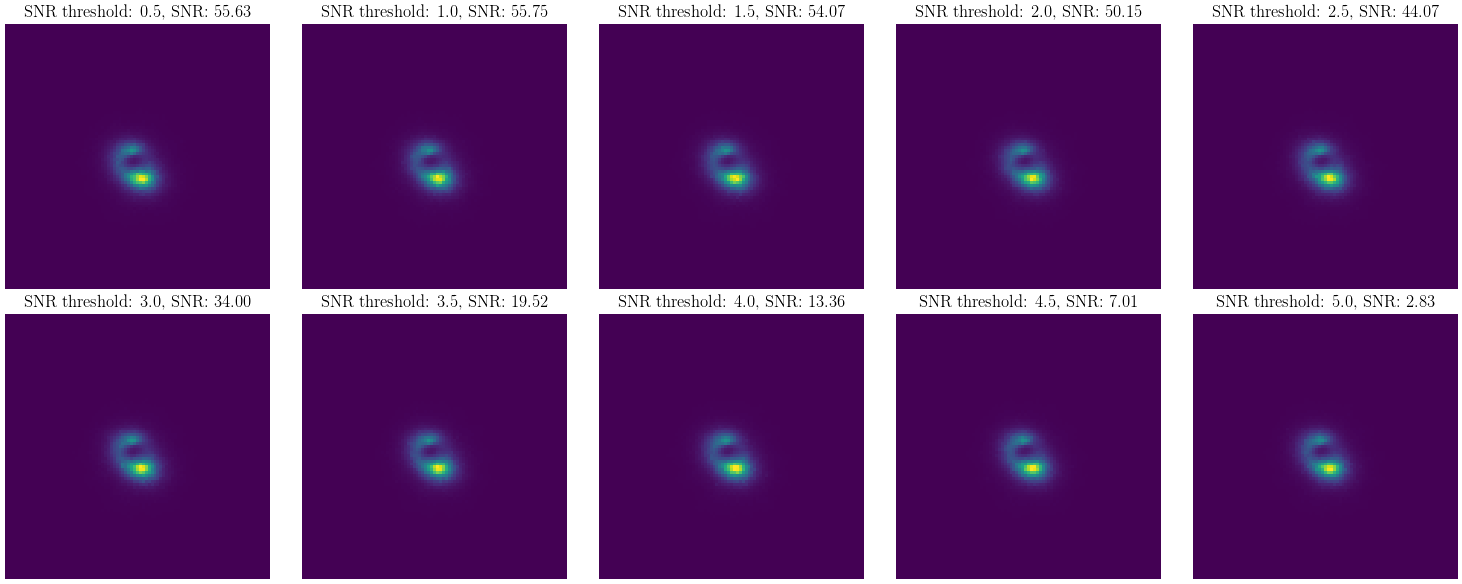

In [12]:
snrs = snr_lists[0]
masked_snr_arrays = masked_snr_array_lists[0]

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for ax, threshold, array, snr in zip(axes, snr_thresholds, masked_snr_arrays, snrs):
    ax.imshow(array)
    ax.set_title(f'SNR threshold: {threshold}, SNR: {snr:.2f}')
    ax.axis('off')

plt.tight_layout()
plt.show()